<a href="https://colab.research.google.com/github/seccobo1/BIPM-Projects/blob/main/Exercise6_Elias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyLDAvis

In [2]:
import pandas as pd
from seaborn import heatmap
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from gensim import corpora, models
from pyLDAvis.gensim_models import prepare
import pickle
import pyLDAvis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [3]:
df = pd.read_json("https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json")

In [4]:
df.head()

,content,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data_stem = pickle.load(open('/content/drive/MyDrive/STRAYZ/stemmed.pkl', 'rb'))

In [7]:
df_stem = pd.DataFrame(data_stem,columns=['preprocessed'])

In [8]:
df_stem.head()

,preprocessed
0,car wonder enlighten car saw dai door sport ca...
1,clock poll final clock report acceler clock up...
2,question folk mac plu final gave ghost weekend...
3,weitek robert kyanko rob rjck uucp wrote abrax...
4,shuttl launch question articl cowcb world std ...


In [9]:
df['preprocessed'] = df_stem['preprocessed']

In [10]:
df.head()

,content,target,target_names,preprocessed
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos,car wonder enlighten car saw dai door sport ca...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,clock poll final clock report acceler clock up...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,question folk mac plu final gave ghost weekend...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics,weitek robert kyanko rob rjck uucp wrote abrax...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,shuttl launch question articl cowcb world std ...


In [11]:
filter = ['soc.religion.christian', 'rec.sport.hockey', 'talk.politics.mideast', 'rec.motorcycles']
df = df[df.target_names.isin(filter)]
df.head()

,content,target,target_names,preprocessed
10,From: irwin@cmptrc.lonestar.org (Irwin Arnstei...,8,rec.motorcycles,recommend duc worth ducati gt line ducati gt m...
21,From: leunggm@odin.control.utoronto.ca (Gary L...,10,rec.sport.hockey,nhl team captain articl apr samba oit unc edu ...
28,From: jonh@david.wheaton.edu (Jonathan Hayward...,15,soc.religion.christian,pantheism environment articl apr atho rutger e...
33,From: ayr1@cunixa.cc.columbia.edu (Amir Y Rose...,17,talk.politics.mideast,isra expans lust articl spam math adelaid edu ...
35,From: dchhabra@stpl.ists.ca (Deepak Chhabra)\n...,10,rec.sport.hockey,goali mask articl netnew upenn edu kkeller mai...


In [12]:
tfidf = TfidfVectorizer(max_df=0.7, min_df=0.1)
data_tfidf = tfidf.fit_transform(df.preprocessed)
words = tfidf.get_feature_names()

In [13]:
kmeans = KMeans(n_clusters = 4, max_iter=1000)
kmeans.fit(data_tfidf)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: D

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

The words will be devided into 4 clusters (n_clusters = 4). The maximum number of iterations of the k-means algorithm for a single run is set to 100.

In [14]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
  print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : game, team, plai, year, edu, write, think, time, new, like
1 : god, christian, believ, peopl, edu, think, know, question, rutger, mean
2 : com, bike, dod, articl, write, edu, like, apr, good, new
3 : edu, israel, write, peopl, articl, new, know, right, time, state


The coordinates of the centres of the 4 clusters are represented as indices that would sort the arrays. The last 10 of those indices for every cluster are saved in arrays. Afterwards it is itarated over these arrays and the corresponding words from the tfidf feature list to the indices are printed out.

0 -> Hockey
1 -> religion christian
2 -> motorcycles
3 -> politics mideast

In [22]:
df['cluster'] = kmeans.labels_
df.head()

,content,target,target_names,preprocessed,cluster
10,From: irwin@cmptrc.lonestar.org (Irwin Arnstei...,8,rec.motorcycles,recommend duc worth ducati gt line ducati gt m...,2
21,From: leunggm@odin.control.utoronto.ca (Gary L...,10,rec.sport.hockey,nhl team captain articl apr samba oit unc edu ...,0
28,From: jonh@david.wheaton.edu (Jonathan Hayward...,15,soc.religion.christian,pantheism environment articl apr atho rutger e...,1
33,From: ayr1@cunixa.cc.columbia.edu (Amir Y Rose...,17,talk.politics.mideast,isra expans lust articl spam math adelaid edu ...,3
35,From: dchhabra@stpl.ists.ca (Deepak Chhabra)\n...,10,rec.sport.hockey,goali mask articl netnew upenn edu kkeller mai...,3


Adding the labels of each point from the cluster to the dataframe.

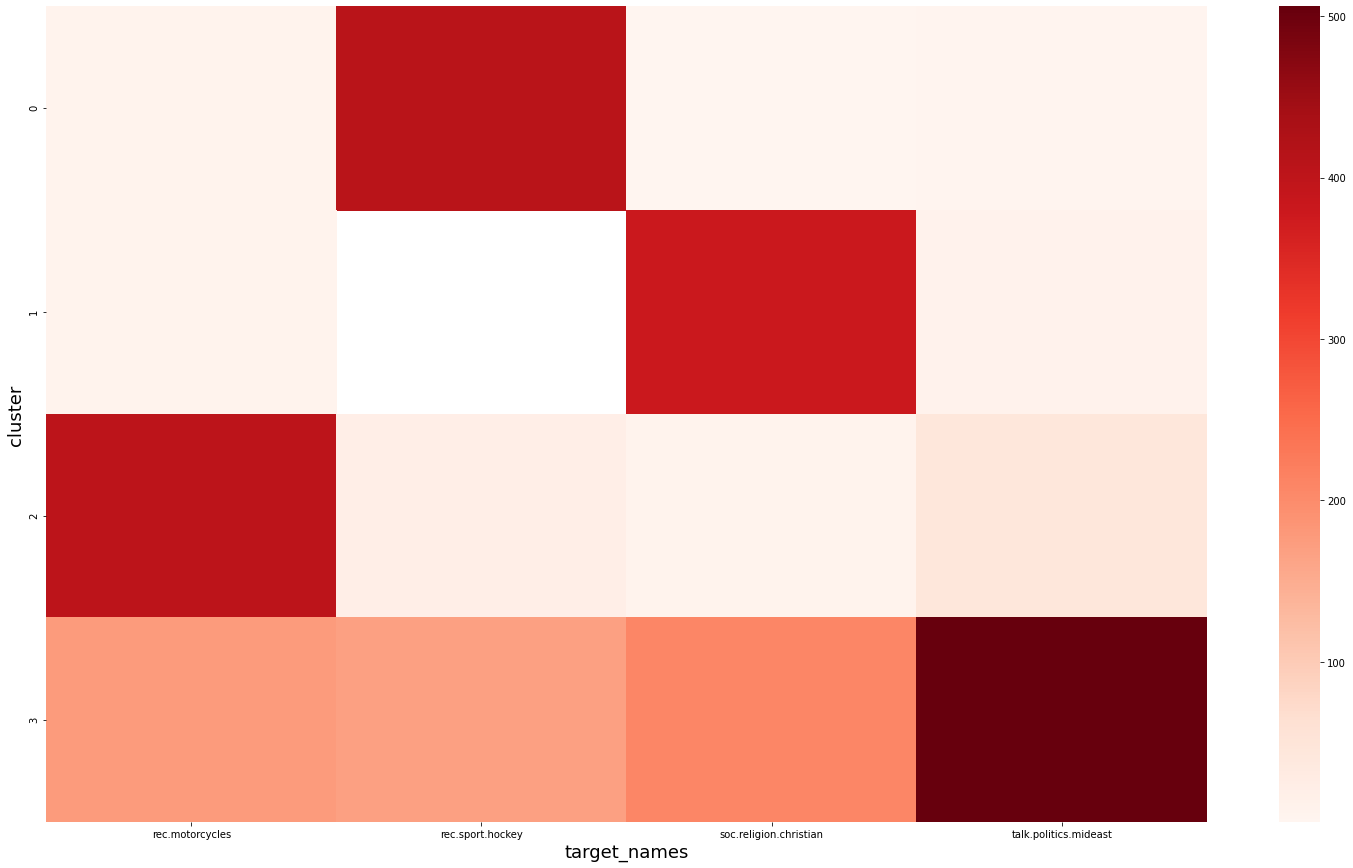

In [23]:
clusters = df.groupby(['cluster', 'target_names']).size()
fig, ax1 = plt.subplots(figsize = (26, 15))
heatmap(clusters.unstack(level = 'target_names'), ax = ax1, cmap = 'Reds')
ax1.set_xlabel('target_names').set_size(18)
ax1.set_ylabel('cluster').set_size(18)

Some of the listed keywords in 4 confirm the view of 6, but it is rather hard to compare both.

In [26]:
df.loc[df.cluster == 0, "pred"] = 10
df.loc[df.cluster == 1, "pred"] = 15
df.loc[df.cluster == 2, "pred"] = 8
df.loc[df.cluster == 3, "pred"] = 17

In [27]:
df.head()

,content,target,target_names,preprocessed,cluster,pred
10,From: irwin@cmptrc.lonestar.org (Irwin Arnstei...,8,rec.motorcycles,recommend duc worth ducati gt line ducati gt m...,2,8.0
21,From: leunggm@odin.control.utoronto.ca (Gary L...,10,rec.sport.hockey,nhl team captain articl apr samba oit unc edu ...,0,10.0
28,From: jonh@david.wheaton.edu (Jonathan Hayward...,15,soc.religion.christian,pantheism environment articl apr atho rutger e...,1,15.0
33,From: ayr1@cunixa.cc.columbia.edu (Amir Y Rose...,17,talk.politics.mideast,isra expans lust articl spam math adelaid edu ...,3,17.0
35,From: dchhabra@stpl.ists.ca (Deepak Chhabra)\n...,10,rec.sport.hockey,goali mask articl netnew upenn edu kkeller mai...,3,17.0


In [29]:
target_names = ['motorcycles', 'hockey', 'religion christian', 'politics mideast']
print(classification_report(df.target, df.pred, target_names=target_names))

                    precision    recall  f1-score   support

       motorcycles       0.84      0.68      0.75       598
            hockey       0.97      0.68      0.80       600
religion christian       0.96      0.64      0.77       599
  politics mideast       0.48      0.90      0.62       564

          accuracy                           0.72      2361
         macro avg       0.81      0.72      0.73      2361
      weighted avg       0.82      0.72      0.74      2361



Over 0.60 -> quite good :)

In [35]:
from gensim.corpora import Dictionary
corpus_gen=[doc.split() for doc in df['preprocessed']]
dictionary = Dictionary(corpus_gen)
dictionary.filter_extremes(no_below=118, no_above=0.95)
corpus=[dictionary.doc2bow(doc) for doc in corpus_gen]

In [36]:
lda = models.LdaModel(corpus, num_topics=4, id2word=dictionary, chunksize=10, iterations=100, passes=10)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Training an Latent Dirichlet Allocation (LDA) model. We define the the number of requested latent topics to be extracted from the training corpus to be 4, since we know that the real number of topics is 4. To map from word IDs to words, we pass our created dictionaty to id2word.

chunksize (int, optional) – Number of documents to be used in each training chunk.

passes (int, optional) – Number of passes through the corpus during training.

iterations (int, optional) – Maximum number of iterations through the corpus when inferring the topic distribution of a corpus.

In [37]:
lda.show_topics()

[(0,
  '0.053*"team" + 0.040*"edu" + 0.037*"game" + 0.036*"hockei" + 0.035*"com" + 0.031*"write" + 0.027*"bike" + 0.026*"plai" + 0.025*"new" + 0.025*"articl"'),
 (1,
  '0.026*"peopl" + 0.024*"time" + 0.024*"said" + 0.023*"thing" + 0.022*"right" + 0.020*"post" + 0.019*"wai" + 0.018*"need" + 0.017*"read" + 0.017*"year"'),
 (2,
  '0.076*"israel" + 0.056*"isra" + 0.046*"state" + 0.043*"jew" + 0.036*"kill" + 0.034*"arab" + 0.031*"war" + 0.031*"edu" + 0.029*"attack" + 0.029*"write"'),
 (3,
  '0.042*"god" + 0.027*"edu" + 0.025*"know" + 0.025*"think" + 0.022*"christian" + 0.021*"believ" + 0.020*"write" + 0.019*"like" + 0.019*"peopl" + 0.018*"reason"')]

We see a representation for our 4 topics. Since the default "num_words" is 10, we see the 10 best words to represent a topic. The Number next to the topic represents by how much it defines the topic.

0 -> hockey
1 -> 
2 -> politics mideast
3 -> religion christian